<a href="https://colab.research.google.com/github/tranhuuan170302/Tran-Huu-An-data-analyst/blob/main/predict_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn import tree
%matplotlib inline


In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
result = pd.read_csv('/content/gender_submission.csv')

# Data overview

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
test = test.merge(result, left_on='PassengerId', right_on='PassengerId')

In [ ]:
train.drop('PassengerId', axis = 1, inplace = True)
test.drop('PassengerId', axis = 1, inplace = True)

In [ ]:
# show infomaion data
def missing_value(x):
    listSummary = []
    for i in x.columns:
        row = x[i].shape[0]
        missingVal = x[i].isna().sum()
        unique = len(x[i].unique())
        typeCol = str(x[i].dtype)
        percentageMissingVal = x[i].isna().sum()/x.shape[0]*100
        listSummary.append([i, row,typeCol,unique, missingVal, percentageMissingVal])
    return pd.DataFrame(listSummary, columns = ['Name Columns', 'Total row', 'type col', 'Total unique', 'Total miss val', 'percentage missing value'])
        

In [ ]:
missing_value(train)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,Survived,891,int64,2,0,0.000000
1,Pclass,891,int64,3,0,0.000000
2,Name,891,object,891,0,0.000000
3,Sex,891,object,2,0,0.000000
4,Age,891,float64,89,177,19.865320
5,SibSp,891,int64,7,0,0.000000
6,Parch,891,int64,7,0,0.000000
7,Ticket,891,object,681,0,0.000000
8,Fare,891,float64,248,0,0.000000
9,Cabin,891,object,148,687,77.104377


# summary data Train
- we can see it's has 11 cloumns and 891 row (train).
- the dataset has 5 columns  type is string (Sex, Ticket, Cabin, Embarked).
- in which the dataset has 3 columns is the missing value (Age: 20%, cabin: 77%, Embarked: 0.2)
- Total unique < 10: Pclass, SibSp, Parch, Embarked. we able agree it's category data

In [ ]:
missing_value(test)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,Pclass,418,int64,3,0,0.000000
1,Name,418,object,418,0,0.000000
2,Sex,418,object,2,0,0.000000
3,Age,418,float64,80,86,20.574163
4,SibSp,418,int64,7,0,0.000000
5,Parch,418,int64,8,0,0.000000
6,Ticket,418,object,363,0,0.000000
7,Fare,418,float64,170,1,0.239234
8,Cabin,418,object,77,327,78.229665
9,Embarked,418,object,3,0,0.000000


# summary data Test
- we can see it's has 11 cloumns and 418 row (train).
- the dataset has 5 columns  type is string (Sex, Ticket, Cabin, Embarked).
- in which the dataset has 3 columns is the missing value (Age: 20%, cabin: 78%)
- Total unique < 10: Pclass, SibSp, Parch, Embarked. we able agree it's category data

In [ ]:
missing_value(result)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,PassengerId,418,int64,418,0,0.0
1,Survived,418,int64,2,0,0.0


# summary data Result
- we can see it's has 2 cloumns and 418 row (result).

# Clean data & data mining

## data outline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


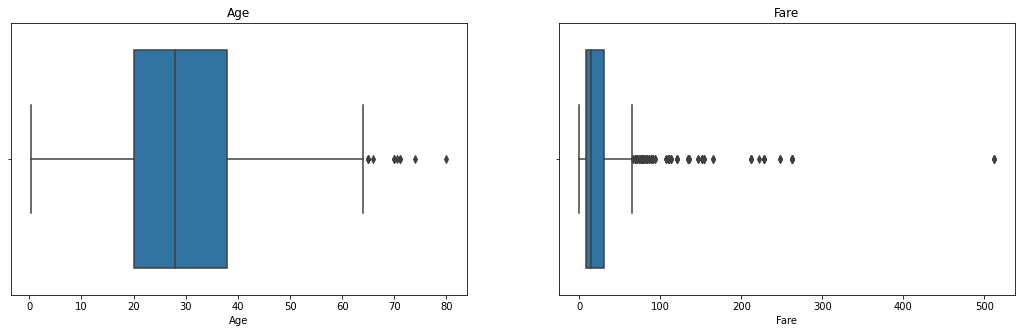

In [ ]:
fig = plt.figure(figsize =(18,5))
plt.subplot(1, 2, 1)
plt.title("Age")
sns.boxplot(train['Age'])

plt.subplot(1, 2, 2)
plt.title("Fare")
sns.boxplot(train['Fare'])
plt.show()

we can see data outline Age between 65 to 80. Fare between 70 to 500

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


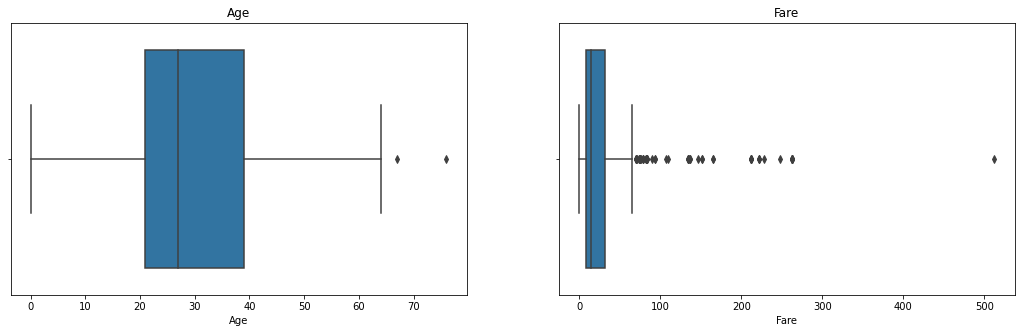

In [ ]:
fig = plt.figure(figsize =(18,5))
plt.subplot(1, 2, 1)
plt.title("Age")
sns.boxplot(test['Age'])

plt.subplot(1, 2, 2)
plt.title("Fare")
sns.boxplot(test['Fare'])
plt.show()

we can see data outline of test Age between 65 to 80. Fare between 70 to 500

### Clean data outline

In [ ]:
dfIdx = train.loc[(train['Age'] > 65)| (train['Fare'] > 70), :].index
train = train.drop(dfIdx, axis = 0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


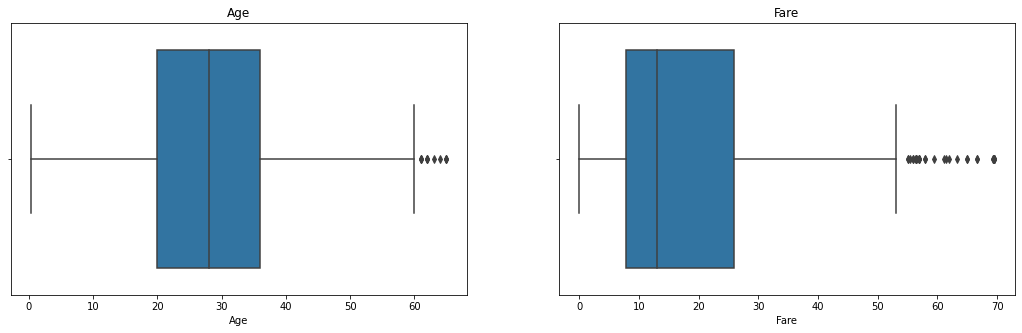

In [ ]:
fig = plt.figure(figsize =(18,5))
plt.subplot(1, 2, 1)
plt.title("Age")
sns.boxplot(train['Age'])

plt.subplot(1, 2, 2)
plt.title("Fare")
sns.boxplot(train['Fare'])
plt.show()

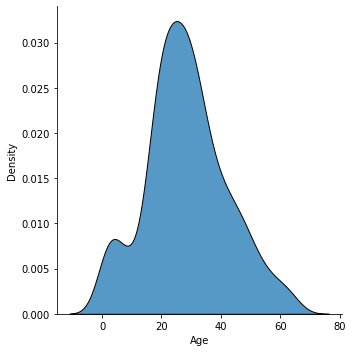

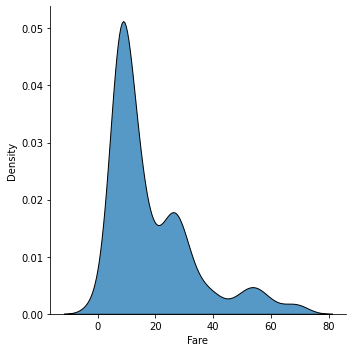

In [ ]:
sns.displot(train, x="Age", kind="kde", multiple="stack")
sns.displot(train, x="Fare", kind="kde", multiple="stack")

In [ ]:
dfIdx = test.loc[(test['Age'] > 65)| (test['Fare'] > 70), :].index
test = test.drop(dfIdx, axis = 0)

In [ ]:
# fig = plt.figure(figsize =(18,5))
# plt.subplot(1, 2, 1)
# plt.title("Age")
# sns.boxplot(test['Age'])

# plt.subplot(1, 2, 2)
# plt.title("Fare")
# sns.boxplot(test['Fare'])
# plt.show()

In [ ]:
# sns.displot(test, x="Age", kind="kde", multiple="stack")
# sns.displot(test, x="Fare", kind="kde", multiple="stack")

In [ ]:
train['title name'] =  train['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
test['title name'] =  test['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [ ]:
Label = ['lower', 'middel', 'upper', 'vip']
train['class Ticket'] = pd.cut(train['Fare'], 4, labels = Label)

test['class Ticket'] = pd.cut(test['Fare'], 4, labels = Label)

In [ ]:
train['class cabin'] = train['Cabin'].str.extract(r'([A-F])', expand = False)
test['class cabin'] = test['Cabin'].str.extract(r'([A-F])', expand = False)

In [ ]:
train.drop(['Name','Ticket', 'Cabin'], axis = 1, inplace = True)
test.drop(['Name','Ticket', 'Cabin'], axis = 1, inplace = True)

In [ ]:
missing_value(train)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,Survived,779,int64,2,0,0.000000
1,Pclass,779,int64,3,0,0.000000
2,Sex,779,object,2,0,0.000000
3,Age,779,float64,82,169,21.694480
4,SibSp,779,int64,7,0,0.000000
5,Parch,779,int64,7,0,0.000000
6,Fare,779,float64,205,0,0.000000
7,Embarked,779,object,3,0,0.000000
8,title name,779,object,15,0,0.000000
9,class Ticket,779,category,4,0,0.000000


In [ ]:
missing_value(test)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,Pclass,367,int64,3,0,0.000000
1,Sex,367,object,2,0,0.000000
2,Age,367,float64,77,86,23.433243
3,SibSp,367,int64,7,0,0.000000
4,Parch,367,int64,8,0,0.000000
5,Fare,367,float64,142,1,0.272480
6,Embarked,367,object,3,0,0.000000
7,Survived,367,int64,2,0,0.000000
8,title name,367,object,7,0,0.000000
9,class Ticket,367,category,5,1,0.272480


In [ ]:
train['Age'] = train.groupby('title name').Age.apply(lambda x : x.ffill().bfill())
test['Age'] = test.groupby('title name').Age.apply(lambda x : x.ffill().bfill())

In [ ]:
age = train[['Age', 'title name']].groupby('title name')['Age'].mean()
age = pd.DataFrame(age).reset_index()

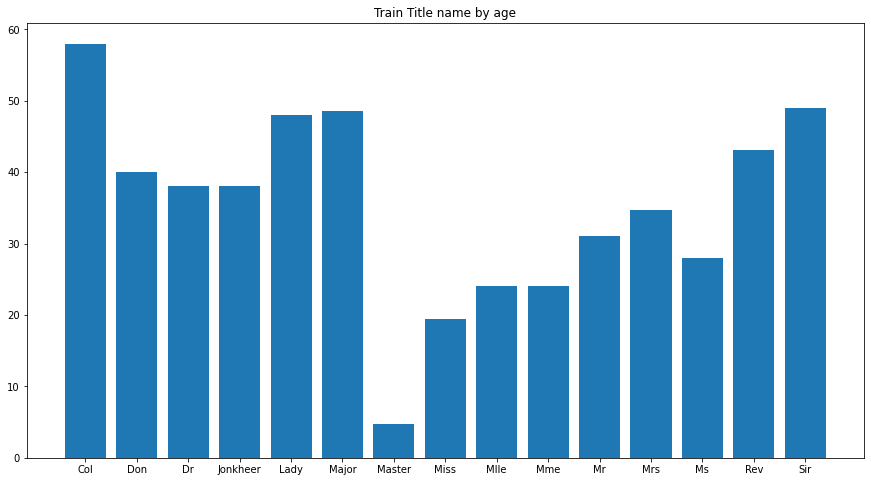

In [ ]:
fig = plt.figure(figsize = (15,8))
plt.title('Train Title name by age')
plt.bar(age['title name'], age['Age'])
plt.show()

In [ ]:
age_test = test[['Age', 'title name']].groupby('title name')['Age'].mean()
age_test = pd.DataFrame(age_test).reset_index()

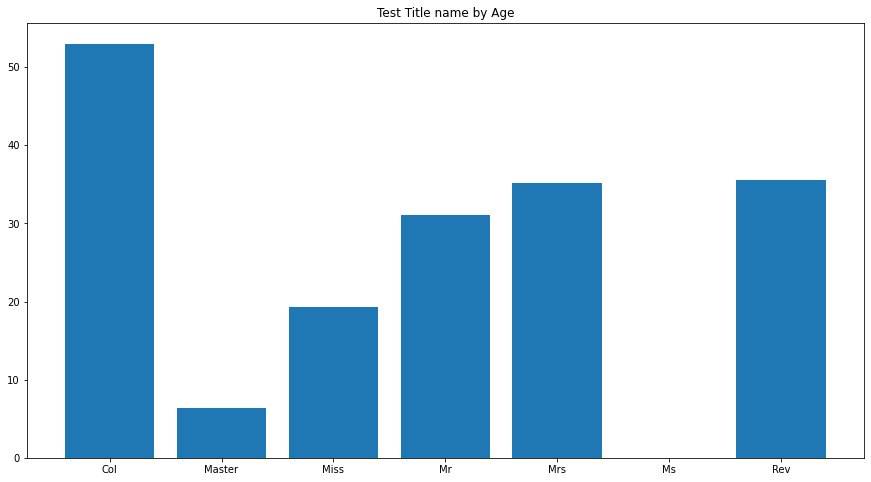

In [ ]:
fig = plt.figure(figsize = (15,8))
plt.title('Test Title name by Age')
plt.bar(age_test['title name'], age_test['Age'])
plt.show()

In [ ]:
train['class cabin'].fillna(value = 'unknow', inplace = True)
test['class cabin'].fillna(value = 'unknow', inplace = True)

In [ ]:
missing_value(train)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,Survived,779,int64,2,0,0.0
1,Pclass,779,int64,3,0,0.0
2,Sex,779,object,2,0,0.0
3,Age,779,float64,81,0,0.0
4,SibSp,779,int64,7,0,0.0
5,Parch,779,int64,7,0,0.0
6,Fare,779,float64,205,0,0.0
7,Embarked,779,object,3,0,0.0
8,title name,779,object,15,0,0.0
9,class Ticket,779,category,4,0,0.0


In [ ]:
missing_value(test)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,Pclass,367,int64,3,0,0.00000
1,Sex,367,object,2,0,0.00000
2,Age,367,float64,77,1,0.27248
3,SibSp,367,int64,7,0,0.00000
4,Parch,367,int64,8,0,0.00000
5,Fare,367,float64,142,1,0.27248
6,Embarked,367,object,3,0,0.00000
7,Survived,367,int64,2,0,0.00000
8,title name,367,object,7,0,0.00000
9,class Ticket,367,category,5,1,0.27248


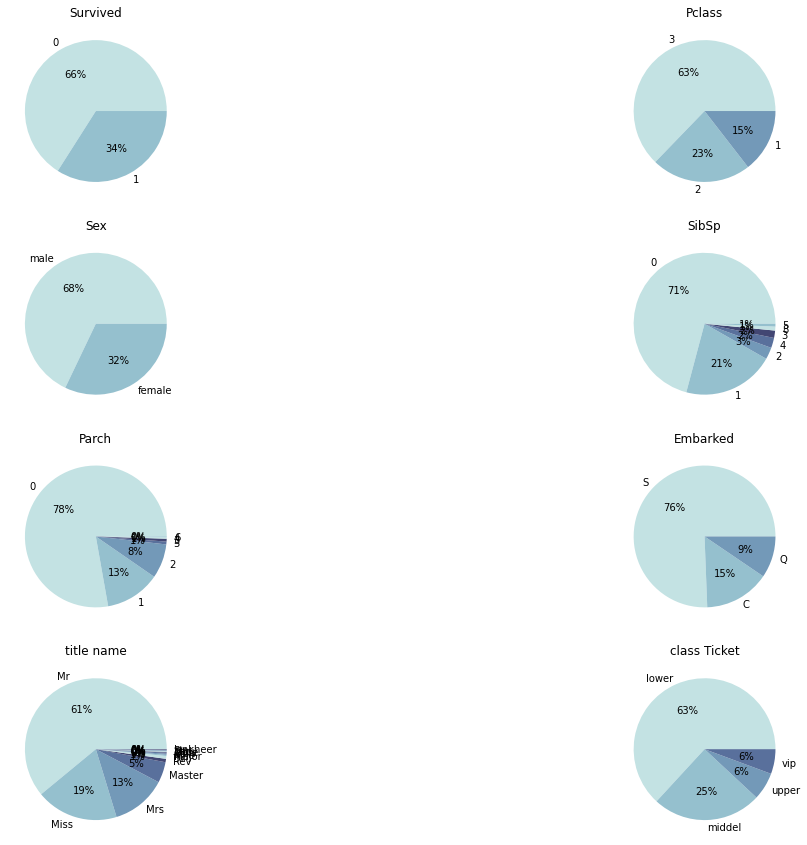

In [ ]:
fig, axs = plt.subplots(4,2,figsize=(20,15))
plot_dict=dict(zip(range(0,10),[axs[0,0],axs[0,1],axs[1,0],axs[1,1],
                     axs[2,0],axs[2,1], axs[3,0], axs[3,1]]))


colors = sns.color_palette("ch:start=.2,rot=-.3")[0:5]
#enumerate returns tuple of month and a number(idx)
for idx, month in enumerate(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'title name', 'class Ticket']):
    #gets axes from dict and plots on it
    plot_dict.get(idx).pie(train[month].value_counts().values,
             labels=train[month].value_counts().index,colors = colors,  autopct='%.0f%%')
    plot_dict.get(idx).set_title(month)

In [ ]:
def groupBar(df, name):
    data = pd.DataFrame(df[[name, 'Survived']].groupby([name, 'Survived'])['Survived'].count())
    data.rename(columns = {'Survived': 'count'}, inplace = True)
    data = data.reset_index()
    data
    sns.barplot(x = 'Survived',
            y = 'count',
            hue = name,
            data = data,
            palette = "Reds")

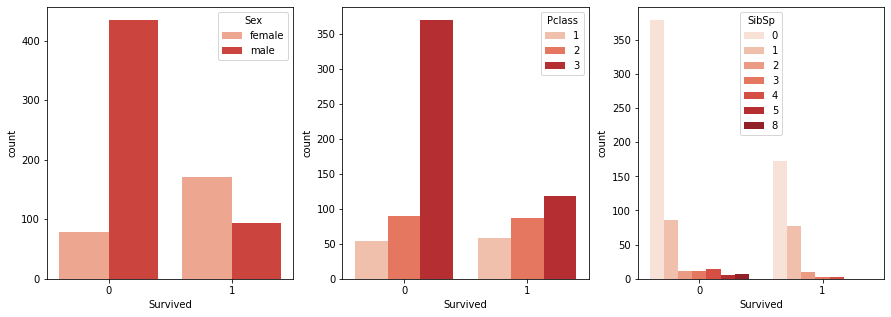

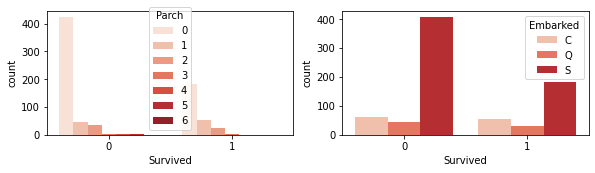

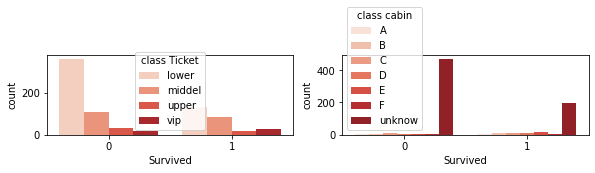

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
groupBar(train, 'Sex')
plt.subplot(1,3,2)
groupBar(train, 'Pclass')
plt.subplot(1,3,3)
groupBar(train, 'SibSp')
plt.show()
fig1 = plt.figure(figsize = (15,5))
plt.subplot(2,3,1)
groupBar(train, 'Parch')
plt.subplot(2,3,2)
groupBar(train, 'Embarked')

plt.show()
fig2 = plt.figure(figsize = (15,5))
plt.subplot(3,3,1)
groupBar(train, 'class Ticket')
plt.subplot(3,3,2)
groupBar(train, 'class cabin')
plt.show()

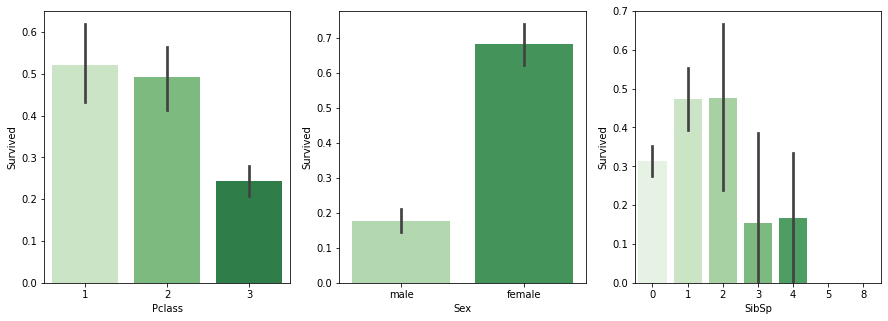

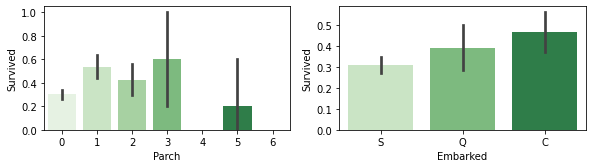

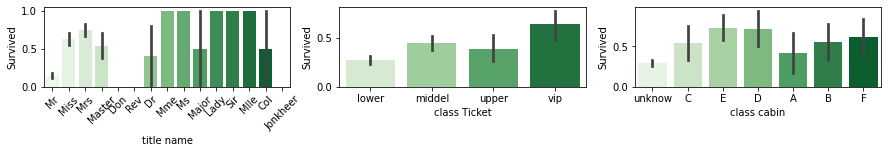

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.barplot(x='Pclass', y='Survived', data=train, palette = "Greens")
plt.subplot(1,3,2)
sns.barplot(x='Sex', y='Survived', data=train, palette = "Greens")
plt.subplot(1,3,3)
sns.barplot(x='SibSp', y='Survived', data=train, palette = "Greens")
plt.show()
fig1 = plt.figure(figsize = (15,5))
plt.subplot(2,3,1)
sns.barplot(x='Parch', y='Survived', data=train, palette = "Greens")
plt.subplot(2,3,2)
sns.barplot(x='Embarked', y='Survived', data=train, palette = "Greens")

plt.show()
fig2 = plt.figure(figsize = (15,5))
plt.subplot(3,3,1)
sns.barplot(x='title name', y='Survived', data=train, palette = "Greens")
plt.xticks(rotation=45)
plt.subplot(3,3,2)
sns.barplot(x='class Ticket', y='Survived', data=train, palette = "Greens")
plt.subplot(3,3,3)
sns.barplot(x='class cabin', y='Survived', data=train, palette = "Greens")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


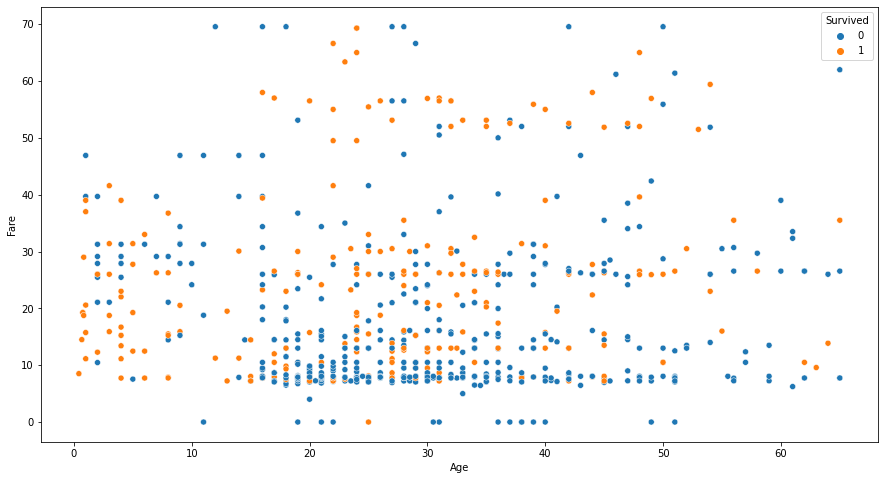

In [ ]:
fig = plt.figure(figsize =(15,8))
sns.scatterplot(train['Age'], train['Fare'], hue = train['Survived'])
plt.show()

In [ ]:
for i in train.columns:
    print("=======================", i, "=======================")
    print(train[i].value_counts())

======================= Survived =======================
0    514
1    265
Name: Survived, dtype: int64
======================= Pclass =======================
3    489
2    177
1    113
Name: Pclass, dtype: int64
======================= Sex =======================
male      529
female    250
Name: Sex, dtype: int64
======================= Age =======================
19.0    34
25.0    33
22.0    32
21.0    32
28.0    31
        ..
63.0     1
20.5     1
36.5     1
14.5     1
34.5     1
Name: Age, Length: 81, dtype: int64
======================= SibSp =======================
0    552
1    163
2     21
4     18
3     13
8      7
5      5
Name: SibSp, dtype: int64
======================= Parch =======================
0    606
1     98
2     61
5      5
3      5
4      3
6      1
Name: Parch, dtype: int64
======================= Fare =======================
8.0500     43
13.0000    42
7.8958     38
7.7500     33
26.0000    31
           ..
32.5000     1
6.8583      1
12.6500     1
12.0000  

In [ ]:
def convertStringToNumber(name, df):
    for n in name:
        x = df[n].unique()
        for i in range(len(x)):
            df[n] = df[n].replace(to_replace=x[i], value=i)

In [ ]:
obj = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'title name', 'class Ticket', 'class cabin']
convertStringToNumber(obj, train)
convertStringToNumber(obj, test)

In [ ]:
test.dropna(inplace = True)

In [ ]:
missing_value(test)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,Pclass,365,int64,2,0,0.0
1,Sex,365,int64,2,0,0.0
2,Age,365,float64,75,0,0.0
3,SibSp,365,int64,6,0,0.0
4,Parch,365,int64,7,0,0.0
5,Fare,365,float64,141,0,0.0
6,Embarked,365,int64,3,0,0.0
7,Survived,365,int64,2,0,0.0
8,title name,365,int64,6,0,0.0
9,class Ticket,365,category,4,0,0.0


# Building model predict

In [ ]:
xtrain = train.drop("Survived", axis = 1)
ytrain = train['Survived']

xtest = test.drop("Survived", axis = 1)
ytest = test['Survived']

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [ ]:
clf.score(xtest,ytest)

0.7917808219178082

In [ ]:
def recommend(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, title_name, class_Ticket, class_cabin):
  arr = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, title_name, class_Ticket, class_cabin]])
  pred = clf.predict(arr)
  print('result: ',pred[0])


In [ ]:
recommend(0, 0,34.5,0,0,7.8292,0,0,0,0)

result:  0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
clf.predict(xtest)

numpy.ndarray

In [ ]:
test['test_predict'] = clf.predict(xtest)

In [ ]:
test.to_csv('summit.csv')

In [ ]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,title name,class Ticket,class cabin,test_predict
0,0,0,34.5,0,0,7.8292,0,0,0,0,0,0
1,0,1,47.0,1,0,7.0000,1,1,1,0,0,1
2,2,0,62.0,0,0,9.6875,0,0,0,0,0,1
3,0,0,27.0,0,0,8.6625,1,0,0,0,0,1
4,0,1,22.0,1,1,12.2875,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
412,0,1,28.0,0,0,7.7750,1,1,2,0,0,1
413,0,0,23.0,0,0,8.0500,1,0,0,0,0,0
415,0,0,38.5,0,0,7.2500,1,0,0,0,0,0
416,0,0,38.5,0,0,8.0500,1,0,0,0,0,0
